In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Day61.csv")
data.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATIONNUM,MARITALSTATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITALGAIN,CAPITALLOSS,HOURSPERWEEK,NATIVECOUNTRY,ABOVE50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [3]:
data.shape

(32561, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AGE            32561 non-null  int64 
 1   WORKCLASS      32561 non-null  object
 2   FNLWGT         32561 non-null  int64 
 3   EDUCATION      32561 non-null  object
 4   EDUCATIONNUM   32561 non-null  int64 
 5   MARITALSTATUS  32561 non-null  object
 6   OCCUPATION     32561 non-null  object
 7   RELATIONSHIP   32561 non-null  object
 8   RACE           32561 non-null  object
 9   SEX            32561 non-null  object
 10  CAPITALGAIN    32561 non-null  int64 
 11  CAPITALLOSS    32561 non-null  int64 
 12  HOURSPERWEEK   32561 non-null  int64 
 13  NATIVECOUNTRY  32561 non-null  object
 14  ABOVE50K       32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


[Text(0, 0, ' Bachelors'),
 Text(1, 0, ' HS-grad'),
 Text(2, 0, ' 11th'),
 Text(3, 0, ' Masters'),
 Text(4, 0, ' 9th'),
 Text(5, 0, ' Some-college'),
 Text(6, 0, ' Assoc-acdm'),
 Text(7, 0, ' Assoc-voc'),
 Text(8, 0, ' 7th-8th'),
 Text(9, 0, ' Doctorate'),
 Text(10, 0, ' Prof-school'),
 Text(11, 0, ' 5th-6th'),
 Text(12, 0, ' 10th'),
 Text(13, 0, ' 1st-4th'),
 Text(14, 0, ' Preschool'),
 Text(15, 0, ' 12th')]

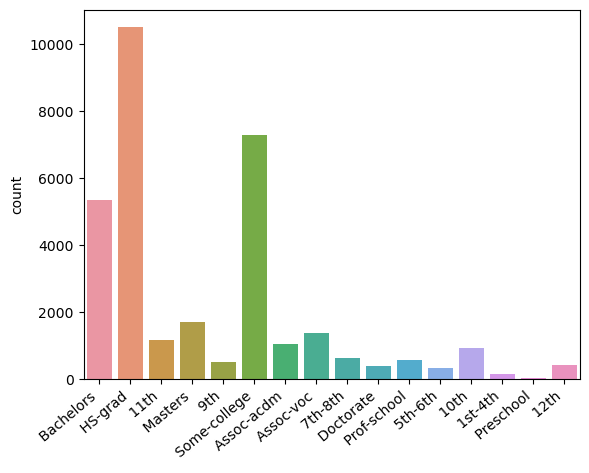

In [5]:
a = sns.countplot(x=data.EDUCATION.values, data=data)
a.set_xticklabels(a.get_xticklabels(),rotation=40, ha="right")

[Text(0, 0, ' Adm-clerical'),
 Text(1, 0, ' Exec-managerial'),
 Text(2, 0, ' Handlers-cleaners'),
 Text(3, 0, ' Prof-specialty'),
 Text(4, 0, ' Other-service'),
 Text(5, 0, ' Sales'),
 Text(6, 0, ' Craft-repair'),
 Text(7, 0, ' Transport-moving'),
 Text(8, 0, ' Farming-fishing'),
 Text(9, 0, ' Machine-op-inspct'),
 Text(10, 0, ' Tech-support'),
 Text(11, 0, ' ?'),
 Text(12, 0, ' Protective-serv'),
 Text(13, 0, ' Armed-Forces'),
 Text(14, 0, ' Priv-house-serv')]

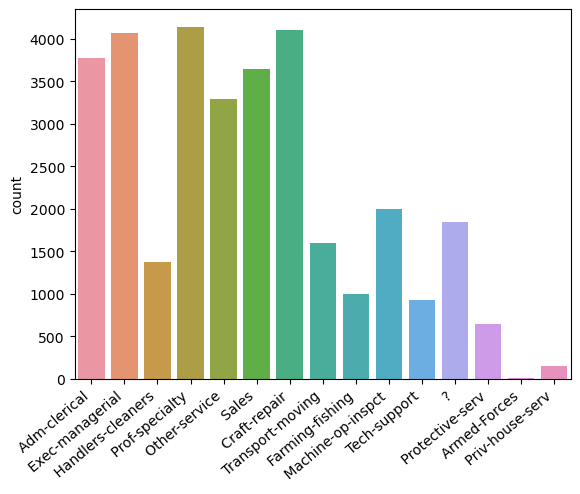

In [11]:
b = sns.countplot(x=data.OCCUPATION.values, data=data)
b.set_xticklabels(b.get_xticklabels(),rotation=40, ha="right")

[Text(0, 0, ' Never-married'),
 Text(1, 0, ' Married-civ-spouse'),
 Text(2, 0, ' Divorced'),
 Text(3, 0, ' Married-spouse-absent'),
 Text(4, 0, ' Separated'),
 Text(5, 0, ' Married-AF-spouse'),
 Text(6, 0, ' Widowed')]

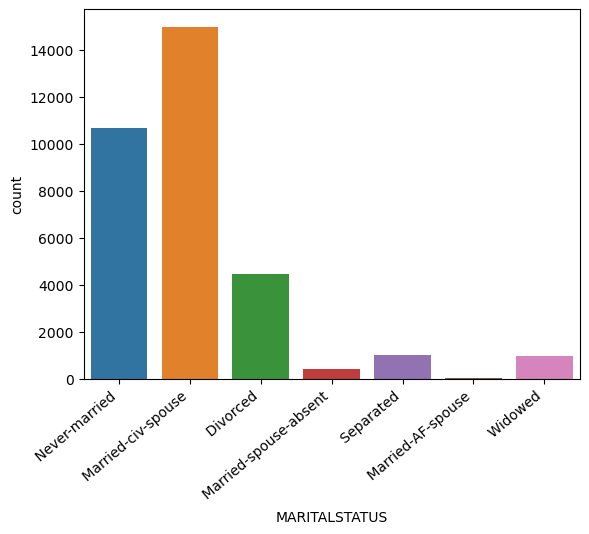

In [12]:
c = sns.countplot(x=data.iloc[:,5], data=data)
c.set_xticklabels(c.get_xticklabels(),rotation=40, ha="right")

<Axes: ylabel='Frequency'>

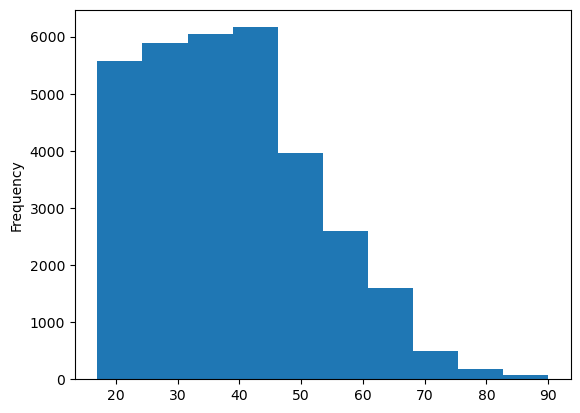

In [13]:
data.iloc[:,0].plot.hist()

In [14]:
#Independent variable
X = data.iloc[:,12].values
#Dependent variable
y = data.iloc[:,14].values

In [15]:
X

array([40, 13, 40, ..., 40, 20, 40], dtype=int64)

In [16]:
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [17]:
#Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [18]:
X_train

array([60, 30, 35, ..., 40, 40, 45], dtype=int64)

In [20]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.98      0.86      7550
           1       0.31      0.04      0.06      2219

    accuracy                           0.76      9769
   macro avg       0.54      0.51      0.46      9769
weighted avg       0.67      0.76      0.68      9769



In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
cm

array([[7372,  178],
       [2140,   79]], dtype=int64)

In [28]:
cm[0,0]

7372

Text(0.5, 1.0, 'Confusion Matrix')

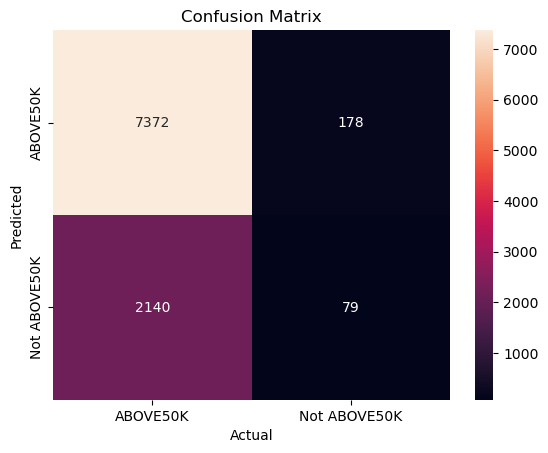

In [30]:
sns.heatmap(cm,annot=True,fmt='g',xticklabels=['ABOVE50K','Not ABOVE50K'],yticklabels=['ABOVE50K','Not ABOVE50K'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')

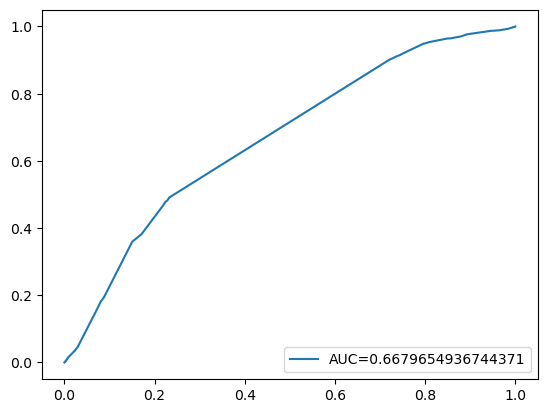

In [36]:
from sklearn import metrics
y_pred_prob = model.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_prob)
auc = metrics.roc_auc_score(y_test,y_pred_prob)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
